# __How much does the data scientist earn?__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

### Reading the [dataset](https://www.kaggle.com/phuchuynguyen/datarelated-developers-survey-by-stack-overflow?select=processed_data_toDummies.csv) loaded from Kaggle.com.

In [2]:
df = pd.read_csv('processed_data_toDummies.csv')

In [3]:
df.head()

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,1,0,NaN
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,"5,000 to 9,999 employees",Computer science,4.0,1,0,NaN
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,20 to 99 employees,Computer science,15.0,0,1,NaN
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,100 to 499 employees,Computer science,5.0,0,1,NaN


In [4]:
df.columns

Index(['Year', 'Hobbyist', 'ConvertedComp', 'Country', 'EdLevel', 'Employment',
       'JobSat', 'OrgSize', 'UndergradMajor', 'YearsCodePro',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Data or business analyst'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33601 entries, 0 to 33600
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           33601 non-null  int64  
 1   Hobbyist                                       33601 non-null  object 
 2   ConvertedComp                                  33601 non-null  float64
 3   Country                                        33601 non-null  object 
 4   EdLevel                                        33138 non-null  object 
 5   Employment                                     33561 non-null  object 
 6   JobSat                                         33526 non-null  float64
 7   OrgSize                                        31904 non-null  object 
 8   UndergradMajor                                 30515 non-null  object 
 9   YearsCodePro                                   335

In [6]:
df.isna().sum()

Year                                                0
Hobbyist                                            0
ConvertedComp                                       0
Country                                             0
EdLevel                                           463
Employment                                         40
JobSat                                             75
OrgSize                                          1697
UndergradMajor                                   3086
YearsCodePro                                       83
Data scientist or machine learning specialist       0
Database administrator                              0
Data or business analyst                         2564
dtype: int64

In [7]:
df.shape

(33601, 13)

Replacing column names.

In [8]:
df = df.rename(columns={"ConvertedComp": "Salary", "Database administrator": "DB admin", "Data scientist or machine learning specialist": "DS or ML"})

Here I groupped some values into more general groups.

In [9]:
unique = []
for number in df['UndergradMajor']:
    if number not in unique:
        unique.append(number)
unique

['Computer science',
 'Computer programming or Web development',
 'Humanities',
 'Another engineering discipline',
 nan,
 'Natural science',
 'Information systems',
 'Computer engineering or electrical/electronics engineering',
 'Business',
 'Mathematics or statistics',
 'Fine arts or performing arts',
 'Health science',
 'Something else',
 'Social science',
 'I never declared a major',
 'Web development or web design']

In [10]:
df['UndergradMajor'] = np.where((df['UndergradMajor'] == 'Computer science') |
                                (df['UndergradMajor'] == 'Computer programming or Web development')|
                                (df['UndergradMajor'] == 'Computer engineering or electrical/electronics engineering'),
                                "CS", df['UndergradMajor'] )
df['UndergradMajor']  = np.where((df['UndergradMajor'] == 'Another engineering discipline')|
                                (df['UndergradMajor'] == 'Information systems'),
                                 "IT", df['UndergradMajor'])
df['UndergradMajor']  = np.where(df['UndergradMajor'] == 'Mathematics or statistics',
                                  "Maths", df['UndergradMajor'])
df['UndergradMajor']  = np.where((df['UndergradMajor'] =='Humanities')|
                                 (df['UndergradMajor'] ==  'Natural science')|
                                 (df['UndergradMajor'] == 'Business')|
                                 (df['UndergradMajor'] == 'Fine arts or performing arts')|
                                 (df['UndergradMajor'] == 'Health science')|
                                 (df['UndergradMajor'] == 'Something else')|
                                 (df['UndergradMajor'] =='Social science'),
                                "Other", df['UndergradMajor'])
df['UndergradMajor']  = np.where(df['UndergradMajor'] == 'I never declared a major',
                                 "NoMajor", df['UndergradMajor'])

In [11]:
unique = []
for number in df['UndergradMajor']:
    if number not in unique:
        unique.append(number)
unique

['CS', 'Other', 'IT', nan, 'Maths', 'NoMajor', 'Web development or web design']

In [12]:
df['UndergradMajor'] = df["UndergradMajor"].replace(np.nan, 'NotDefined')

In [13]:
unique = []
for number in df['EdLevel']:
    if number not in unique:
        unique.append(number)
unique

["Bachelor's degree",
 "Some college/university study without earning a bachelor's degree",
 "Master's degree",
 'Secondary school',
 'Doctoral degree',
 'Professional degree',
 'I prefer not to answer',
 'Primary/elementary school',
 'I never completed any formal education',
 'Associate degree',
 nan]

In [14]:
df['EdLevel'] = np.where(df['EdLevel'] == 'I never completed any formal education',
                                "NoEducation", df['EdLevel'])
df['EdLevel'] = np.where(df['EdLevel'] == 'I prefer not to answer',
                                "NotDefined", df['EdLevel'])
df['EdLevel'] = np.where(df['EdLevel'] == "Some college/university study without earning a bachelor's degree",
                                "Some college/university study", df['EdLevel'])

In [15]:
df['EdLevel'] = df["EdLevel"].replace(np.nan, 'NotDefined')

Replacing NAs of 'YearsCodePro' with its average.

In [16]:
df['YearsCodePro'] = df["YearsCodePro"].replace(np.nan, df["YearsCodePro"].mean())

In [17]:
np.unique(df['Data or business analyst'])

array([ 0.,  1., nan, ..., nan, nan, nan])

In [18]:
df['Data or business analyst'] = df['Data or business analyst'].replace(np.nan, "Else")

In [19]:
df = df.dropna()

In [20]:
df.isna().sum()

Year                        0
Hobbyist                    0
Salary                      0
Country                     0
EdLevel                     0
Employment                  0
JobSat                      0
OrgSize                     0
UndergradMajor              0
YearsCodePro                0
DS or ML                    0
DB admin                    0
Data or business analyst    0
dtype: int64

In [21]:
df.describe()

,Year,Salary,JobSat,YearsCodePro,DS or ML,DB admin
count,31871.000000,31871.000000,31871.000000,31871.000000,31871.000000,31871.000000
mean,2018.787926,62583.288808,6.112391,8.668701,0.322864,0.534781
std,0.901444,48617.607929,1.919672,7.130531,0.467579,0.498797
min,2017.000000,0.176186,0.000000,1.000000,0.000000,0.000000
25%,2018.000000,24986.000000,5.000000,3.000000,0.000000,0.000000
50%,2019.000000,53448.000000,6.000000,6.000000,0.000000,1.000000
75%,2019.000000,87000.000000,8.000000,12.000000,1.000000,1.000000
max,2020.000000,299436.000000,10.000000,30.000000,1.000000,1.000000


In [22]:
df.describe(include = 'object')

,Hobbyist,Country,EdLevel,Employment,OrgSize,UndergradMajor,Data or business analyst
count,31871,31871,31871,31871,31871,31871,31871.0
unique,5,178,10,3,11,7,3.0
top,Yes,United States,Bachelor's degree,Employed full-time,20 to 99 employees,CS,0.0
freq,23835,8740,13507,28243,6851,16558,19895.0


#### Now as the data is clean and we don't have missing values we can pass to the main part: try to understand how much data scientists all over the world earn and which are the factors that affect the most their salary by visualizing the data. 

## Average salary from 2017-2020

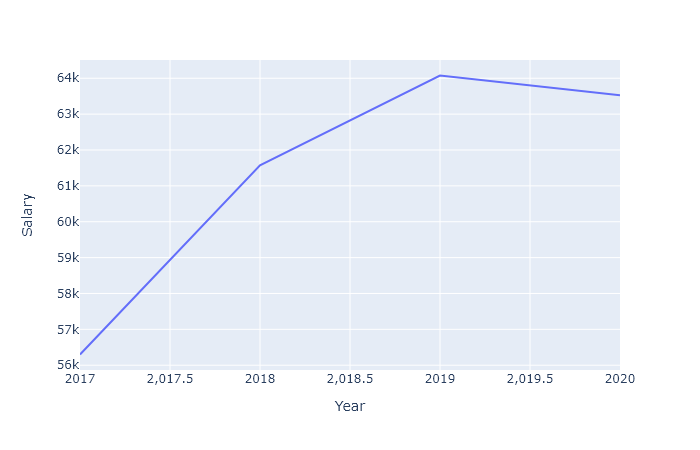

In [23]:
fig = go.Figure()
grouped_year = df.groupby(['Year'])['Salary'].mean().reset_index('Year')
fig = px.line(grouped_year, x = 'Year', y = 'Salary')
fig.show(renderer="png")

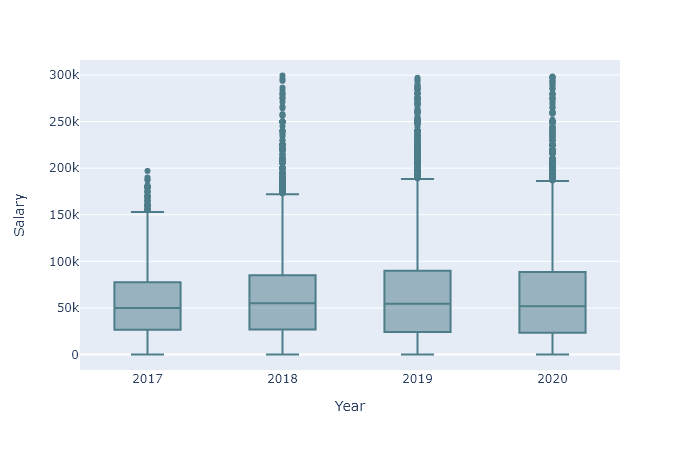

In [25]:
fig = px.box(df, x = 'Year', y = 'Salary',color_discrete_sequence=['#4c7d89']*4)
fig.show(renderer="png")

Looking at the line chart above we can say that the average salary had increase from 2017 to 2018 then rather smaller increase from 2018 to 2019 and then started decresing (which is strange). But looking at the boxplot we can see that these changes are trivial and the avergae salary has remained almost the same for 4 years.


## Top 10 countries with highest and lowest average salaries

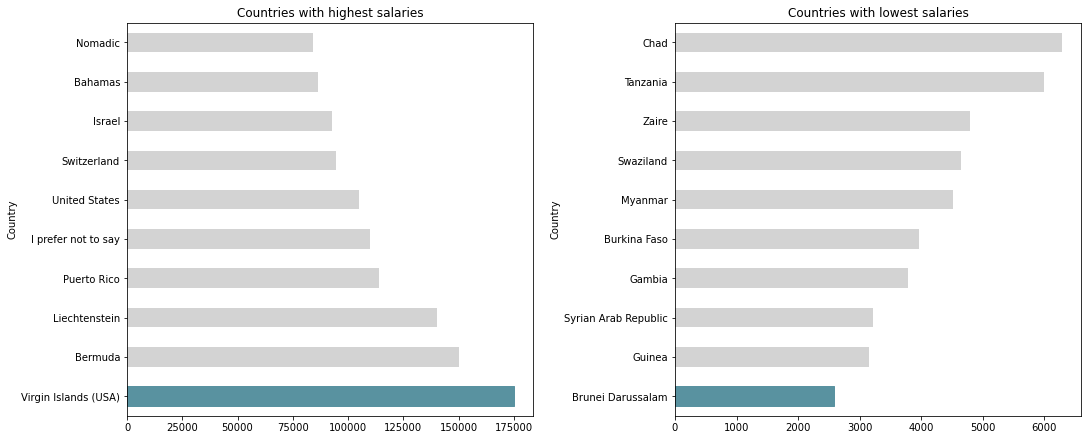

In [26]:
countries = df.groupby(['Country']).mean()
top_10_highest = countries['Salary'].sort_values(ascending=False)[:10]
top_10_lowest = countries['Salary'].sort_values(ascending=True)[:10]

plt.rcParams["figure.figsize"]=(15,6)
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1, 2)


ax1 = fig.add_subplot(gs[0,0])
ax1 = top_10_highest.plot(kind='barh', color = 'lightgrey')
ax1.get_children()[0].set_color('#5992a0')
ax1.set_title("Countries with highest salaries")

ax2 = fig.add_subplot(gs[0,1])
ax2 = top_10_lowest.plot(kind='barh', color = 'lightgrey')
ax2.get_children()[0].set_color('#5992a0')
ax2.set_title("Countries with lowest salaries")

plt.show()

Here we can see that the highest average salary is in Virgin Islands (USA) and the lowest average salary is in Brunei Darussalam (country in Asia).

## Correlation matrix

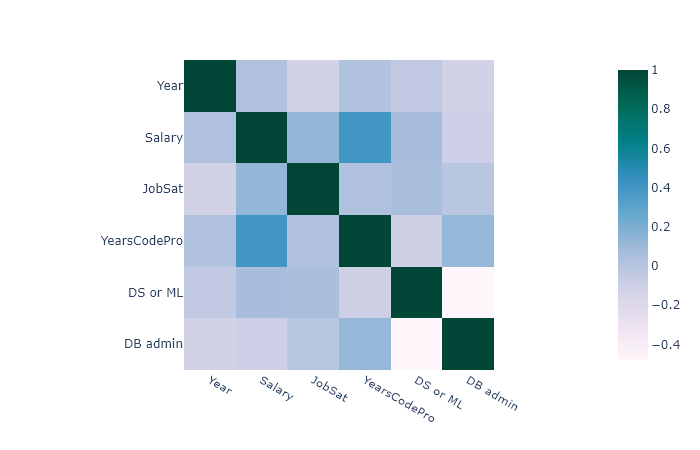

In [27]:
corr = df.corr()
fig = px.imshow(corr, color_continuous_scale=px.colors.sequential.PuBuGn)

fig.show(renderer="png")

In [28]:
code_pro = df.groupby('Year').mean()['YearsCodePro'].reset_index('Year')
code_pro

,Year,YearsCodePro
0,2017,8.208347
1,2018,8.655327
2,2019,8.483796
3,2020,9.129166


According to this correlation matrix the salary is positively correlated to years people coded professioanaly. However as we've seen previoulsy the salary decreased from 2019 to 2020 and as we see from the table above the average years of professionally coding has increased (which is logical) meaning there are other factors that affect the salary.

## Education level and Salary

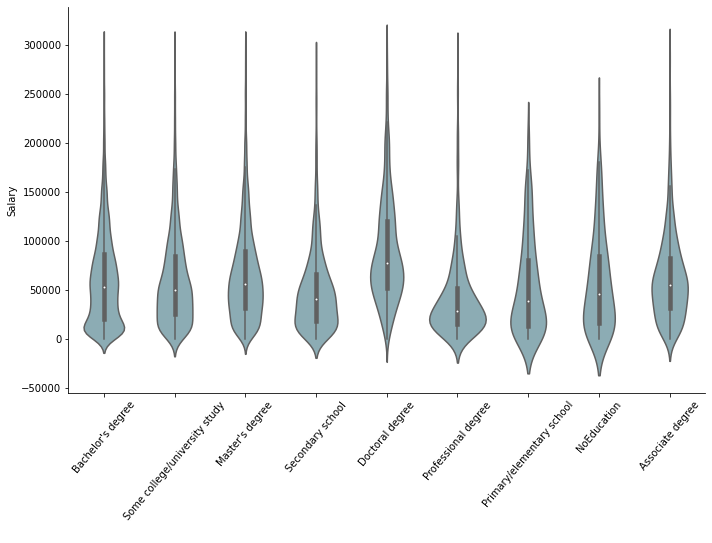

In [29]:
ax = sns.catplot(x = df[df["EdLevel"] != 'NotDefined']["EdLevel"], y="Salary", 
            kind="violin",  data=df, color = '#85b0bb')
plt.xticks(rotation = 50)
plt.xlabel(" ")
ax.fig.set_figwidth(12)
ax.fig.set_figheight(6)

Doctoral degree has the highest median.

## Job satisfaction depending on whether the person is Data Scientist or Machine Learning specialist

In [30]:
conditions_sat  = [(df['JobSat'] <= 4),
                   (df['JobSat'] > 4) & (df['JobSat'] <=  7),
              (df['JobSat'] > 7)]
              
sat_level = ['NotSatisfied', 'SatisfiedEnough', 'Satisfied']
df['SatLevel'] = np.select(conditions_sat, sat_level)
sat_level = df['SatLevel']
df['DS or ML'].value_counts()
ds = df['DS or ML'] == 0
ml = df['DS or ML'] == 1
scores1 = sat_level[ds]
scores2 = sat_level[ml]
freq1 = scores1.value_counts()
freq2 = scores2.value_counts()

plot_data = pd.DataFrame({'DS':freq1, "ML": freq2})
plot_data.fillna(0)
plot_data = plot_data.div(plot_data.sum(axis=1), axis = 0)*100
plot_data = plot_data.fillna(0)

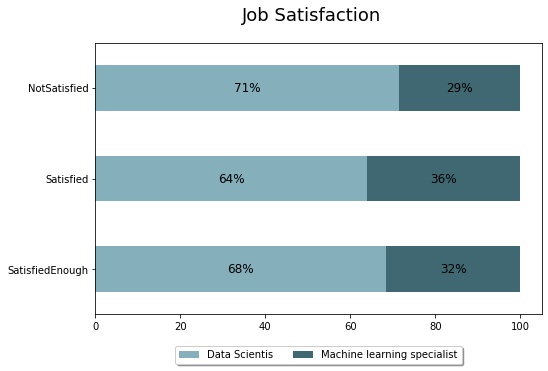

In [31]:
plt.rcParams["figure.figsize"]=(8,5)
color = ['#85b0bb','#3f6872']
ax = plot_data.plot(kind='barh', stacked = True, color = color)

plt.legend(['Data Scientis', 'Machine learning specialist'], loc='lower center', bbox_to_anchor=(0.5, -0.2),
          ncol=5,  shadow=True)
plt.suptitle("Job Satisfaction", size = 18)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', size = 12)

## Comparing average years people coded professionally in Armenia, India and USA

In [55]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'])

In [33]:
conditions_years  = [(df['YearsCodePro']) <= 1,
                   (df['YearsCodePro'] > 1) & (df['YearsCodePro'] <=  4),
                   (df['YearsCodePro'] > 4) & (df['YearsCodePro'] <=  9),
                   (df['YearsCodePro'] > 9) & (df['YearsCodePro'] <=  19),
                   (df['YearsCodePro'] > 19) ]
              
exp_year = ['Less than 1 year', '1-4', '5-9', '10-19', '20+']
df['ExpYear'] = np.select(conditions_years, exp_year)

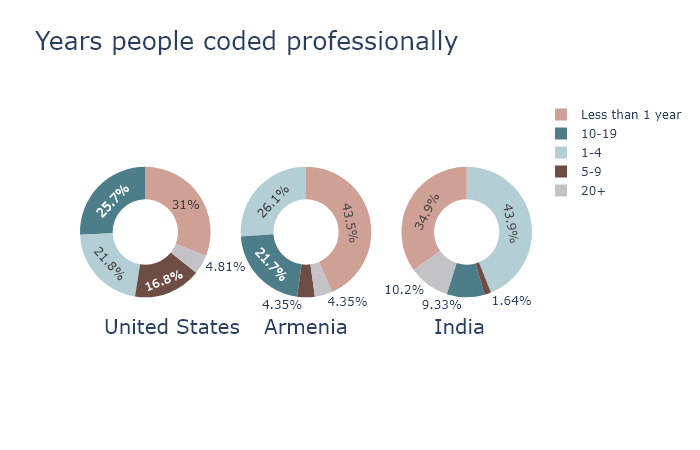

In [34]:
labels = []
for number in df['ExpYear']:
    if number not in labels:
        labels.append(number)
        
        
colors = ['#6c7b88','#6c4742','#e2ecf0','#9ea4a4','#073c4c']

col = ["#dad9e1","#d3c2ba","#53a3ae","#294668","#002345"]

col1 = ["#69bbd4","#f0eef5","#c77d7e","#c0c9cd","#004a82"]
col2 = ['#b3ced4', "#4c7d89", "#6d4d44", "#cfa095", "#c3c2c6"]

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'},{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=df.loc[df['Country'] == 'United States'].groupby(df.iloc[:,14]).size(), name="US"),
              1, 1, )
fig.add_trace(go.Pie(labels=labels, values=df.loc[df['Country'] == 'Armenia'].groupby(df.iloc[:,14]).size(), name="Armenia"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=df.loc[df['Country'] == 'India'].groupby(df.iloc[:,14]).size(), name="India"),
              1, 3)
fig.update_traces(hole=.5, hoverinfo="label+percent+name", marker=dict(colors=col2))
fig.update_layout(
    title_text="Years people coded professionally",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='United States', x=0.049, y=0.09, font_size=20, showarrow=False),
                 dict(text='Armenia', x=0.5, y=0.09, font_size=20, showarrow=False),
                dict(text='India', x=0.9, y=0.09, font_size=20, showarrow=False)],
                title_font_size=25)
fig.show(renderer="png")

## Salaries in different countries including Armenia

In [35]:
countries = df[(df['Country'] == 'United States') | (df['Country'] == 'India') | (df['Country'] == 'Turkey')  |
            (df['Country'] == 'Georgia') | (df['Country'] == "France") |(df['Country'] == 'Armenia')]
countries.groupby('Country').size()

Country
Armenia            23
France            857
Georgia            18
India            2014
Turkey            311
United States    8740
dtype: int64

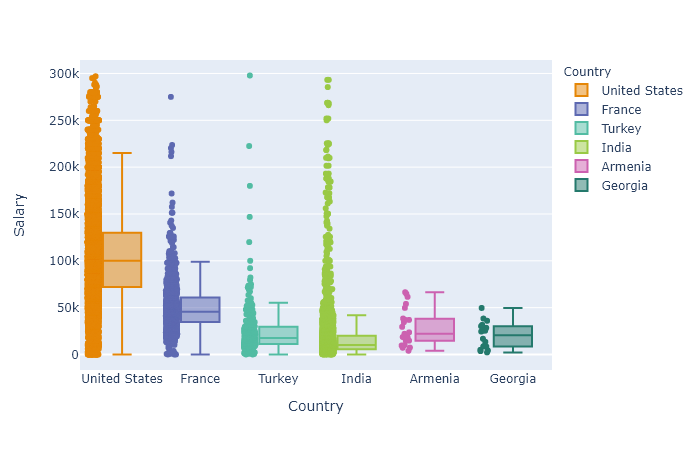

In [36]:
fig = px.box(countries, x= 'Country', y= 'Salary', points="all", color = 'Country',color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show(renderer="png")

## Education Level in different countries

In [37]:
educ = []
for number in df['EdLevel']:
    if number not in educ:
        educ.append(number)
educ

["Bachelor's degree",
 'Some college/university study',
 "Master's degree",
 'Secondary school',
 'Doctoral degree',
 'Professional degree',
 'NotDefined',
 'Primary/elementary school',
 'NoEducation',
 'Associate degree']

In [38]:
dat = df.groupby(['Country','EdLevel']).count().reset_index('Country')[['Country','Year']]

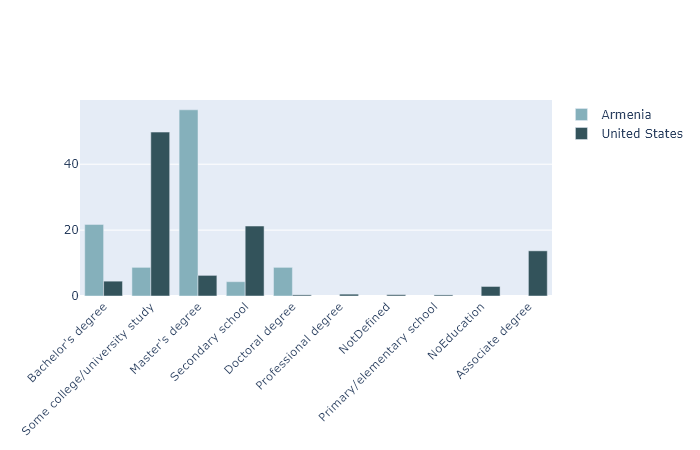

In [39]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=educ ,
    y=(dat[dat['Country'] == 'Armenia']['Year']/ sum(dat[dat['Country'] == 'Armenia']['Year']))*100,
    name='Armenia',
    marker_color='#85b0bb'
))
fig.add_trace(go.Bar(
    x=educ,
    y=(dat[dat['Country'] == 'United States']['Year']/ sum(dat[dat['Country'] == 'United States']['Year']))*100,
    name='United States',
    marker_color='#33535b'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show(renderer="png")

In this chart I tried to show how much percentage each Education level has in each country. But as we saw from the boxplot above the we don't have much data concerning Armenia that's why not all levels are present for Armenia. Anyway we can see that in our country the percentage of people with Bachelor's and Master's degree is higher.

In order to see what it would look like if we had more datapoints I made the same plot for Germany and United States.

In [514]:
a=df.groupby('Country').size().reset_index('Country')
a[a[0]>2000 ]

,Country,0
55,Germany,2394
68,India,2095
166,United Kingdom,2381
168,United States,9086


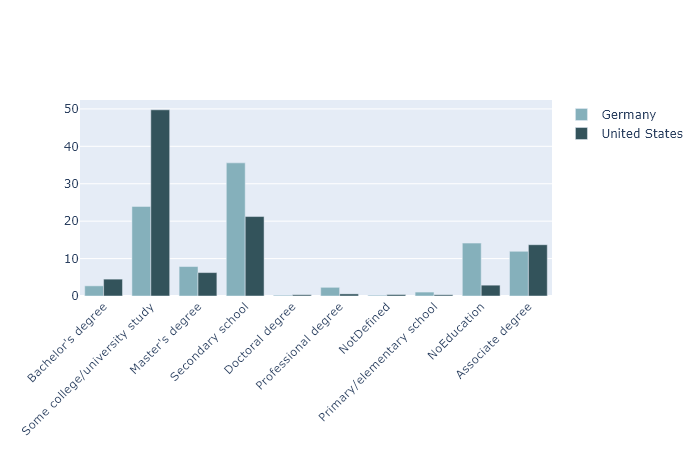

In [40]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=educ ,
    y=(dat[dat['Country'] == 'Germany']['Year']/ sum(dat[dat['Country'] == 'Germany']['Year']))*100,
    name='Germany',
    marker_color='#85b0bb'
))
fig.add_trace(go.Bar(
    x=educ,
    y=(dat[dat['Country'] == 'United States']['Year'] / sum(dat[dat['Country'] == 'United States']['Year']))*100,
    name='United States',
    marker_color='#33535b'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show(renderer="png")

Here we see that in Germany there are more people with Master's degree and Secondary School degree while people with some studies (without finishing the education) are more in USA. Let's compare salaries in this countries.

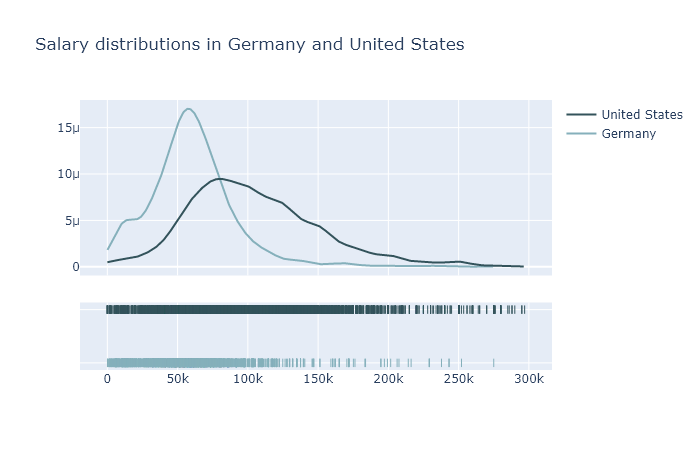

In [41]:
x1 = df[df['Country'] == 'Germany']['Salary']
x2 = df[df['Country'] == 'United States']['Salary']
hist_data = [x1, x2]

group_labels = ['Germany', 'United States']
colors = ['#85b0bb', '#33535b']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

fig.update_layout(title_text='Salary distributions in Germany and United States')
fig.show(renderer="png")

The plot above shows that generally the salary is higher in Germany than in the USA but as we see the distribution of salary in Germany has more positive skewness while in USA it is more alike to normal distribution.

#### Hope this was interesting for you.
## Thank you !

#### Mery Iskandaryan
